# Teknik Feature Engineering


## Teknik Pemilihan Fitur (Feature Selection)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [2]:
data = load_wine()
X, y = data.data, data.target

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Filter Method

In [5]:
# ------------------- Filter Methods -------------------
# Menggunakan SelectKBest
filter_selector = SelectKBest(score_func=chi2, k=2)  # Memilih 2 fitur terbaik
X_train_filter = filter_selector.fit_transform(X_train, y_train)
X_test_filter = filter_selector.transform(X_test)
 
print("Fitur yang dipilih dengan Filter Methods:", filter_selector.get_support(indices=True))

Fitur yang dipilih dengan Filter Methods: [ 9 12]


# Penjelasan SelectKBest dengan Chi-Squared (χ²)

## SelectKBest
**SelectKBest** adalah salah satu metode dari *filter methods* yang umum digunakan untuk memilih fitur terbaik berdasarkan skor statistik tertentu.

- **Parameter `score_func=chi2`**  
  Berarti metode ini menggunakan **Chi-squared (χ²)** sebagai fungsi skor.  
  Chi-squared adalah uji statistik yang digunakan untuk mengukur independensi antara dua variabel kategorikal.

- **Parameter `k=2`**  
  Artinya hanya akan dipilih **2 fitur terbaik** dari semua fitur yang ada di dataset.  
  Dengan kata lain, ini akan menyeleksi dua fitur dengan skor tertinggi berdasarkan hasil uji Chi-squared.

> Kedua parameter ini bisa Anda sesuaikan dengan studi kasus dan juga *trial and error*.

---

## fit_transform(X_train, y_train)
- **`fit(X_train, y_train)`**  
  Menghitung skor Chi-squared untuk setiap fitur pada data pelatihan (`X_train`) terhadap target (`y_train`).

- **`transform(X_train)`**  
  Menyalin data dari `X_train`, tetapi hanya menyimpan fitur yang dipilih oleh `filter_selector`.

Hasilnya adalah dataset pelatihan baru (`X_train_filter`) yang hanya mengandung **dua fitur terbaik** hasil perhitungan Chi-squared.

---

## transform(X_test)
Fungsi **`transform(X_test)`** digunakan untuk mentransformasikan dataset uji (`X_test`) dengan memilih fitur yang sama seperti pada dataset pelatihan.

---

## get_support(indices=True)
Fungsi **`get_support(indices=True)`** digunakan untuk mendapatkan **indeks fitur** yang dipilih.  
Dalam hal ini, fitur yang dipilih adalah **dua fitur dengan skor tertinggi** berdasarkan uji Chi-squared.

Output dari fungsi ini akan mencetak indeks fitur dari dataset awal sehingga kita tahu fitur mana yang tetap dipertahankan setelah proses seleksi.

---

## Hasil Akhir
- Dataset yang sudah difilter hanya berisi **dua fitur dengan skor independensi terbesar**.  
- Indeks fitur yang dipertahankan bisa digunakan untuk analisis lebih lanjut.  

---

📌 *Sampai di sini, Anda sudah memiliki dataset dengan dua fitur terbaik.  
Namun, tahan dulu rasa penasaran Anda, karena pada akhir materi ini kita akan membandingkan performa dari tiga metode feature selection.*


## Wrapper Method

In [6]:
# Menggunakan RFE (Recursive Feature Elimination)
model = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe_selector = RFE(model, n_features_to_select=2)  # Memilih 2 fitur
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)
 
print("Fitur yang dipilih dengan Wrapper Methods:", rfe_selector.get_support(indices=True))

Fitur yang dipilih dengan Wrapper Methods: [0 6]


## Embedded Methods

In [7]:
from sklearn.ensemble import RandomForestClassifier
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
 
# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
 
# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]
 
# Memindahkan fitur penting ke variabel baru
X_important = X_train[:, important_features_indices]  # Hanya fitur penting dari data pelatihan
X_test_important = X_test[:, important_features_indices]  # Hanya fitur penting dari data pengujian
 
# Mencetak fitur yang dipilih
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{data.feature_names[i]}: {importances[i]}")
 
# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)
print("Dimensi data pengujian dengan fitur penting:", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
alcohol: 0.11239773542143086
flavanoids: 0.20229341635663622
color_intensity: 0.1712021830864957
hue: 0.07089132259413944
od280/od315_of_diluted_wines: 0.1115643167260497
proline: 0.13904586955351153

Dimensi data pelatihan dengan fitur penting: (142, 6)
Dimensi data pengujian dengan fitur penting: (36, 6)


In [8]:
# Evaluasi dengan fitur terpilih dari masing-masing metode
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

In [9]:
# Model Logistic Regression untuk Filter Methods
logistic_model_filter = LogisticRegression(max_iter=200)
accuracy_filter = evaluate_model(X_train_filter, X_test_filter, y_train, y_test, logistic_model_filter)
 
# Model Logistic Regression untuk Wrapper Methods
logistic_model_rfe = LogisticRegression(max_iter=200)
accuracy_rfe = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, logistic_model_rfe)
 
# Model Random Forest untuk Embedded Methods
accuracy_rf = evaluate_model(X_important, X_test_important, y_train, y_test, rf_model)

In [10]:
print(f"\nAkurasi Model dengan Filter Methods: {accuracy_filter:.2f}")
print(f"Akurasi Model dengan Wrapper Methods: {accuracy_rfe:.2f}")
print(f"Akurasi Model dengan Embedded Methods: {accuracy_rf:.2f}")


Akurasi Model dengan Filter Methods: 0.89
Akurasi Model dengan Wrapper Methods: 0.94
Akurasi Model dengan Embedded Methods: 1.00


## Scaling Fitur

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
 
# Contoh data
data = [[10], [2], [30], [40], [50]]
 
# Min-Max Scaling
# rentang dari 0 sampai 1
min_max_scaler = MinMaxScaler()
scaled_min_max = min_max_scaler.fit_transform(data)
print("Min-Max Scaling:\n", scaled_min_max)
 
# Standardization
# rata-rata 0, standar deviasi 1
standard_scaler = StandardScaler()
scaled_standard = standard_scaler.fit_transform(data)
print("\nStandardization:\n", scaled_standard)

Min-Max Scaling:
 [[0.16666667]
 [0.        ]
 [0.58333333]
 [0.79166667]
 [1.        ]]

Standardization:
 [[-0.91133616]
 [-1.35589038]
 [ 0.2000494 ]
 [ 0.75574218]
 [ 1.31143496]]


## Latihan: Studi Kasus Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2,n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

Karena pada akhir materi ini kita akan belajar mengenai salah satu metode oversampling, Anda perlu mengatur nilai weights (rasio) untuk membagi jumlah data pada masing-masing kelas. Pada kasus ini, kita akan membagi 90% data untuk kelas pertama, dan 10% data untuk kelas kedua.

Selanjutnya, Anda perlu mengubah nilai acak yang yang tersimpan dengan tipe data array menjadi DataFrame agar lebih mudah diolah dan dicerna oleh orang lain.

In [3]:
# Menyusun dataset menjadi DataFrame untuk kemudahan
df = pd.DataFrame(X, columns=[f'Fitur_{i}' for i in range(1, 16)])
df['Target'] = y
 
# Misalkan kita punya beberapa fitur kategorikal (simulasi fitur kategorikal)
df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)
 
df

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,B,Y,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,A,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Y,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,C,Y,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,A,Z,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Z,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Z,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,X,-0.128774,0.800834,0


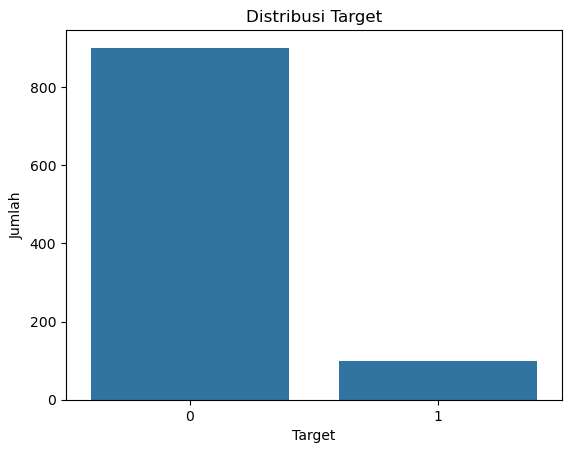

In [4]:
distirbusi = df['Target'].value_counts()
sns.barplot(x=distirbusi.index, y=distirbusi.values)
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.title('Distribusi Target')
plt.show()

In [5]:
# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

In [6]:
# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


In [7]:
df["Fitur_12"].value_counts()

Fitur_12
C    337
B    332
A    331
Name: count, dtype: int64

In [8]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(X_integer, y)
 
# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
 
# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]
 
# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X.columns[i]}: {importances[i]}")
 
# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_integer.columns[important_features_indices]
 
# Memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]  # Hanya fitur penting dari data pelatihan
 
# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Fitur_2: 0.11860019897866206
Fitur_3: 0.06878603593465271
Fitur_5: 0.07731131335837178
Fitur_8: 0.050482655781999855
Fitur_9: 0.2625049418105367
Fitur_10: 0.08958259568334655
Fitur_11: 0.06365230544114515
Fitur_13: 0.12578161860669113

Dimensi data pelatihan dengan fitur penting: (1000, 8)


In [9]:
# menggabungkan fitur numerik yang sudah diproses featue seleksi
# kedua fitur di concat
X_Selected = pd.concat([X_important, X['Fitur_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['Fitur_13']], axis=1)
X_Selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,B,Y
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,A,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,B,Y
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,C,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,Y
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,A,Z
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,A,Z
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,B,Z
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,C,X


In [10]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
# Melakukan Encoding untuk fitur 12
X_Selected['Fitur_12'] = label_encoder.fit_transform(X_Selected['Fitur_12'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_12']]))
# Melakukan Encoding untuk fitur 13
X_Selected['Fitur_13'] = label_encoder.fit_transform(X_Selected['Fitur_13'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_13']]))
 
print(X_Selected)

      Fitur_2   Fitur_3   Fitur_5   Fitur_8   Fitur_9  Fitur_10  Fitur_11  \
0   -3.472520 -1.314199  0.642138  1.146301 -2.173112  2.765828 -1.821258   
1   -1.770842 -1.578851 -2.025230 -3.958705 -0.598147  1.018789  4.194233   
2   -2.051770  3.631998  1.674093  0.031633 -1.140149  2.069694  1.935251   
3   -1.608657 -0.735184 -1.753532 -2.897416 -0.830328  1.572469  5.334621   
4   -2.362885 -3.909120 -4.029843 -3.435229 -2.142380  2.332385  3.816539   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.017325  4.884411  3.033376  1.278882 -1.293396  1.772169 -1.191263   
996 -1.690916  5.949207  2.238469 -1.436622 -2.153011 -0.867583  3.962758   
997 -1.263417 -1.331925  1.777577 -1.846263  1.753033  1.858452  4.264568   
998 -0.975838  0.279144 -0.443749 -1.017319 -0.643070  2.142898  3.399255   
999  1.387667 -5.554578 -2.834755 -1.932864  2.625895  0.246120  0.786726   

     Fitur_15  Fitur_12  Fitur_13  
0   -0.276558         1         1  
1  

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Memilih kolom numerik
numeric_columns = X_Selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])

# Membuat salinan data
X_cleaned = X_important.copy()
y_cleaned = y.copy()

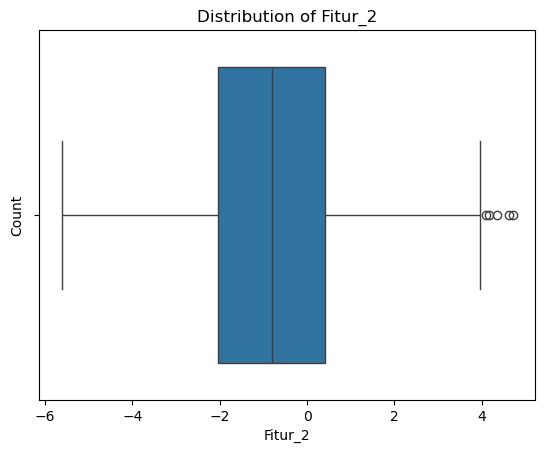

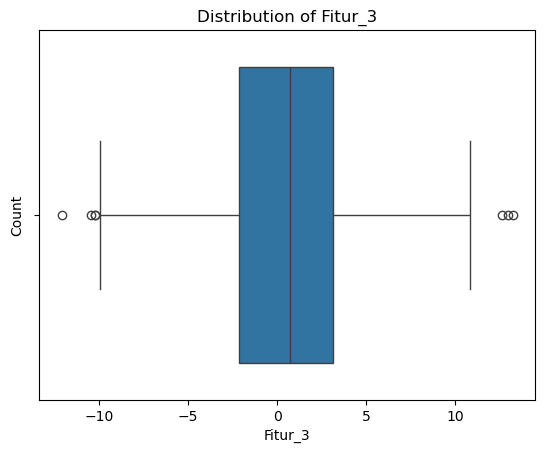

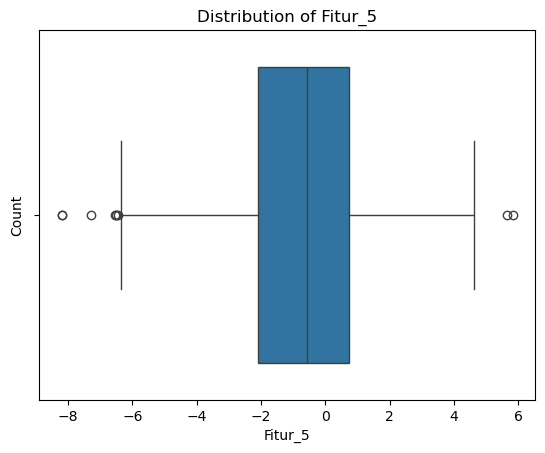

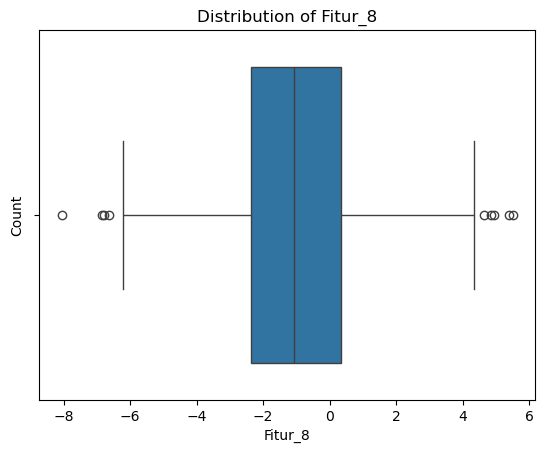

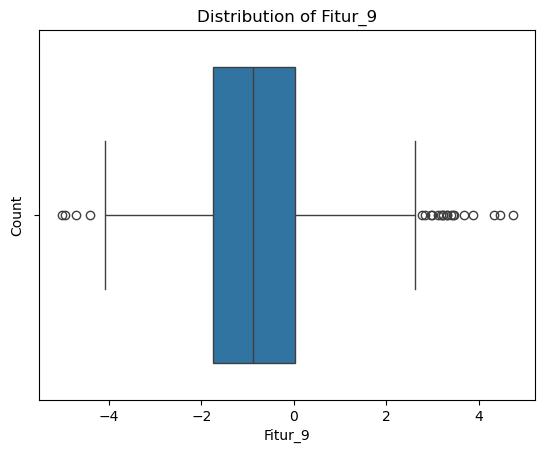

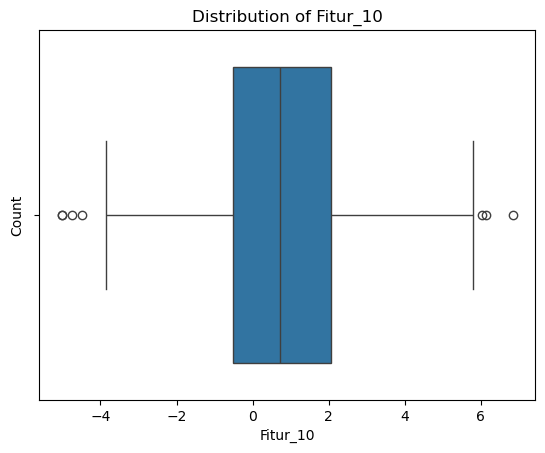

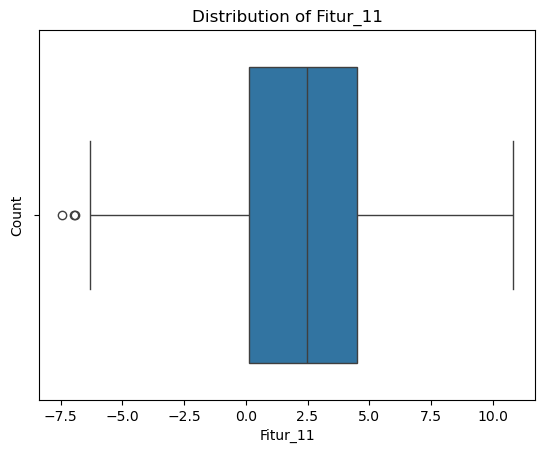

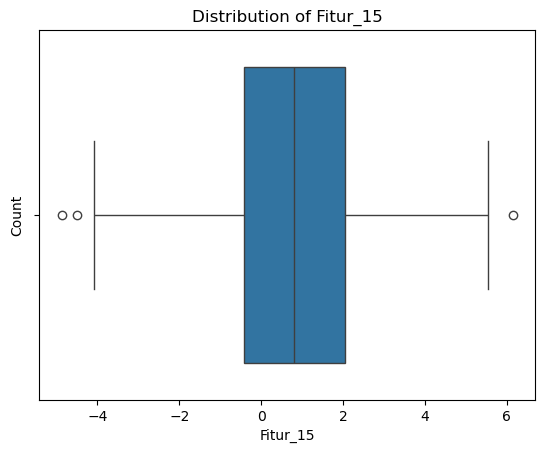

In [14]:
for col in numeric_columns:
    # membuat box plot
    sns.boxplot(x=X_cleaned[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [15]:
outlier_idx = set()

for col in numeric_columns:
    Q1 = X_cleaned[col].quantile(0.25)
    Q3 = X_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cari index outlier untuk kolom ini
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]
    outlier_idx.update(outliers.index)

# Drop sekaligus biar konsisten
X_cleaned = X_cleaned.drop(index=outlier_idx)
y_cleaned = y_cleaned.drop(index=outlier_idx)

print(X_cleaned.shape, y_cleaned.shape)


(949, 8) (949,)


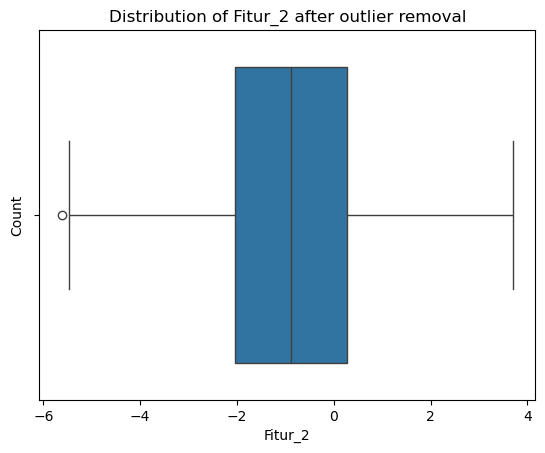

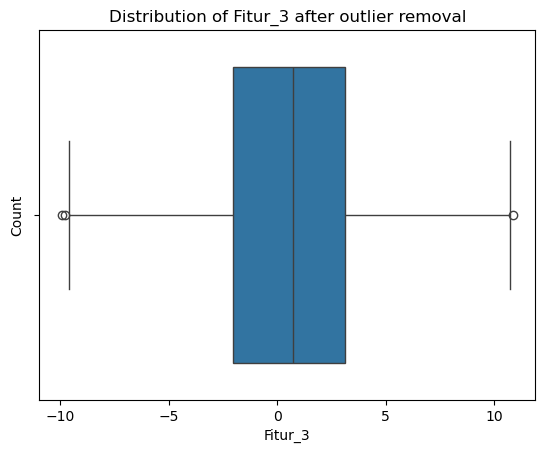

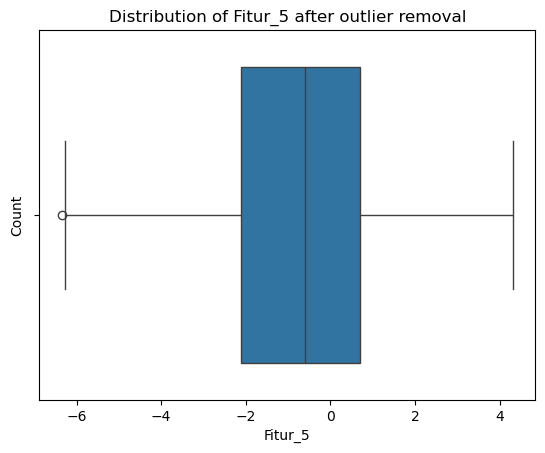

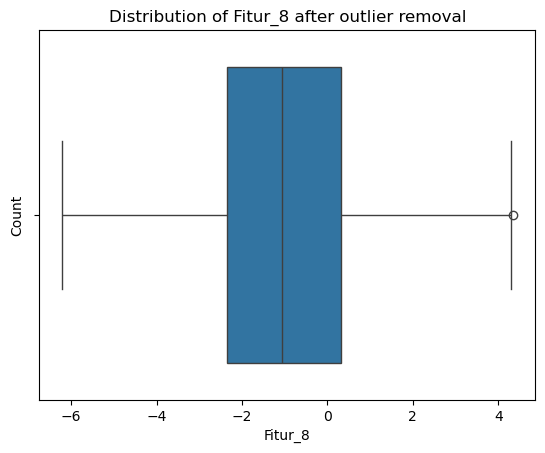

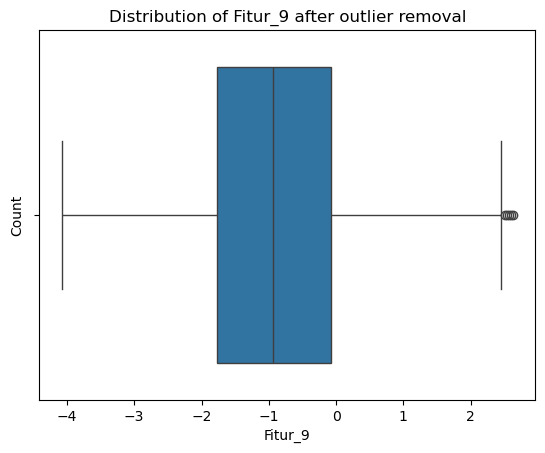

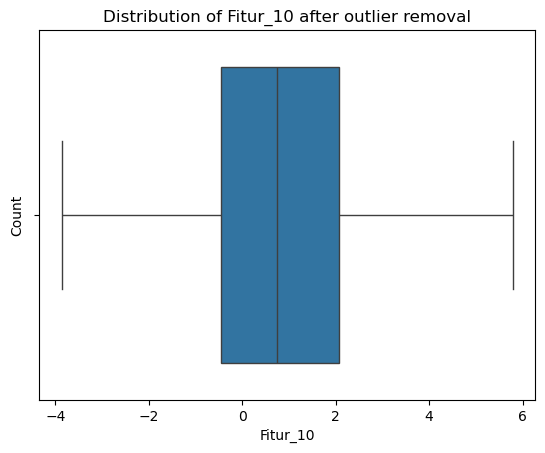

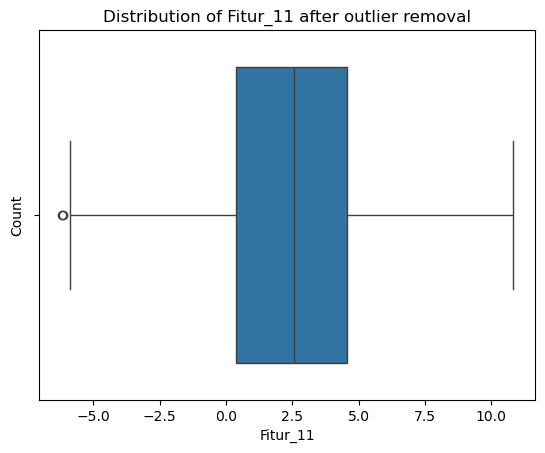

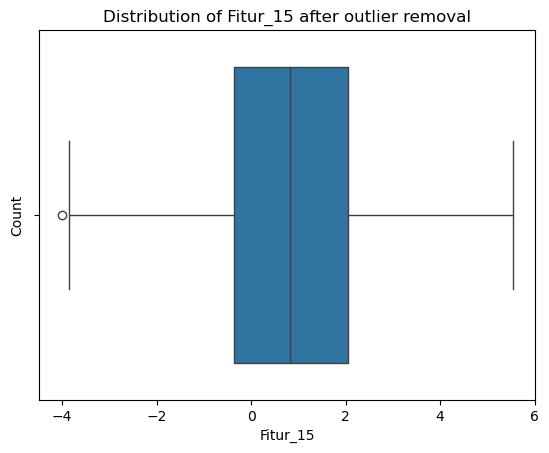

In [16]:
for col in numeric_columns:
    # membuat box plot
    sns.boxplot(x=X_cleaned[col])
    plt.title(f'Distribution of {col} after outlier removal')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [17]:
X_cleaned.sample(5)

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
279,-0.587632,6.980874,1.504601,-0.831150,-2.397330,1.914900,5.731449,-0.779746
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
415,-1.219822,-5.044296,-3.194384,-1.620582,-0.109732,0.669094,2.252759,3.788271
619,1.331070,7.107944,2.025931,-0.066790,-0.454025,0.562969,4.644346,-0.748842
285,-2.068375,-3.361767,-2.259202,0.396201,-1.656308,1.666876,-0.298374,2.822840


In [18]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)
 
# 3. Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)
 
# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))
 
# Mengubah hasil menjadi DataFrame untuk visualisasi atau analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({0: 875, 1: 875})


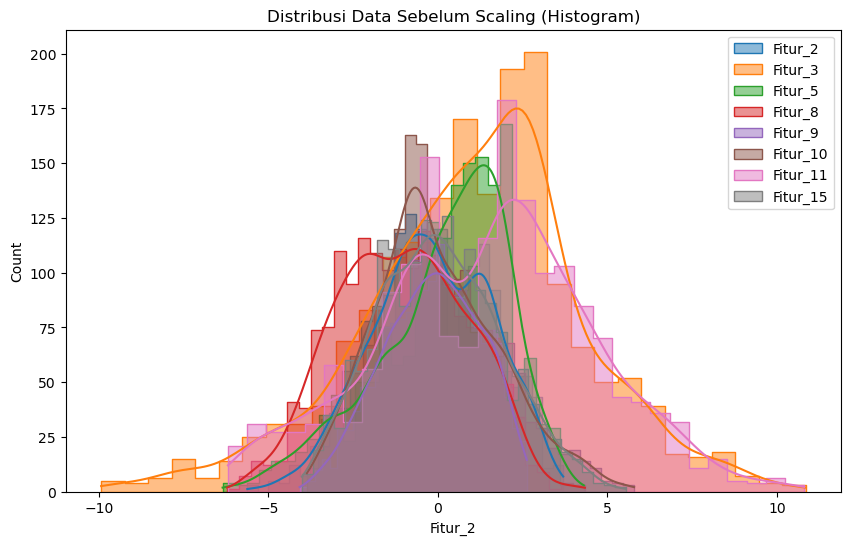

In [19]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [20]:
# Scaling: Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
 
# Melakukan scaling pada fitur penting
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

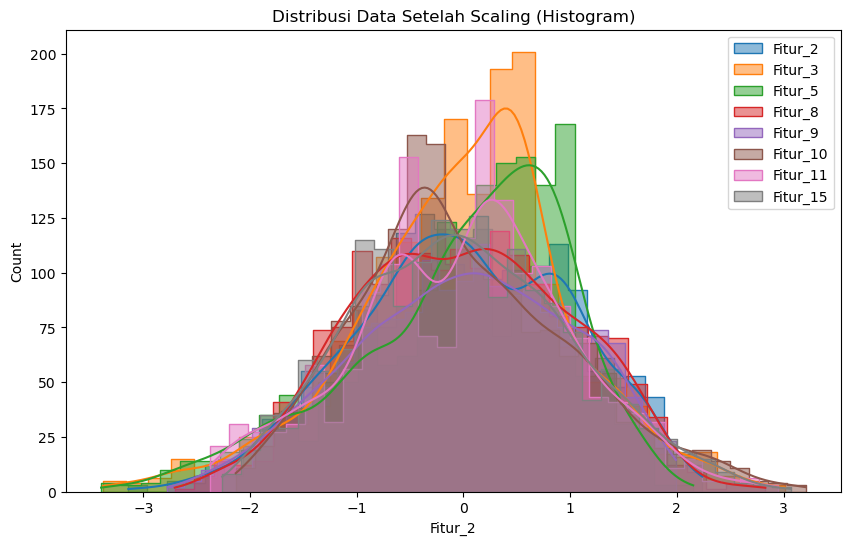

In [21]:
# 1. Visualisasi distribusi data setelah scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [22]:
X_resampled.describe(include='all')

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
count,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-3.248195e-17,0.000000,-4.567775e-18,3.248195e-17,0.000000,6.496391e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-0.587515,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,0.191619,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,0.737479,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00
